In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

In [4]:
# Extracting data
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [5]:
# Our dataset dimensions
dataset.shape

(2000, 9)

In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


<Axes: xlabel='Outcome', ylabel='count'>

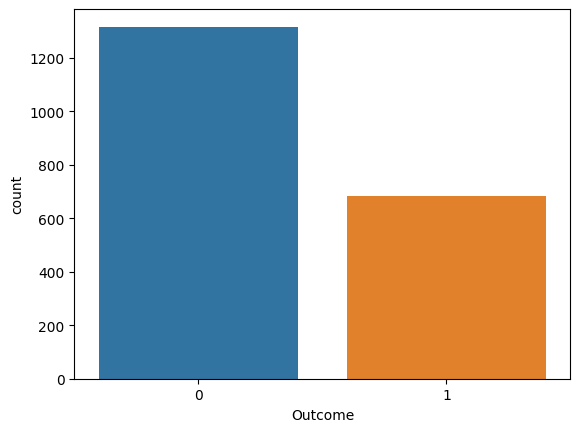

In [7]:
sns.countplot(x='Outcome', data=dataset)

In [8]:
dataset['Outcome'].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

In [9]:
dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.168693,110.586626,68.094985,20.052432,70.563830,30.567477,0.434676,31.081307
1,4.732456,141.568713,71.166667,22.633041,98.897661,35.320468,0.540681,36.956140


<Axes: >

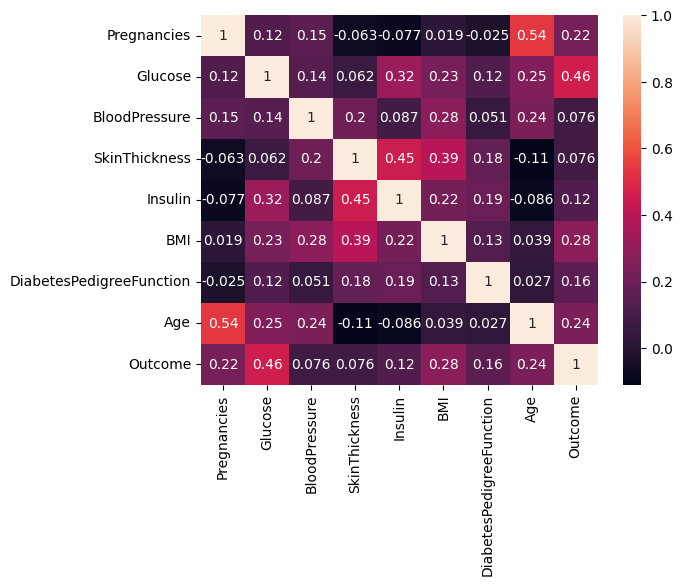

In [10]:
corr_mat = dataset.corr()
sns.heatmap(corr_mat, annot=True)

In [11]:
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# Feature matrix - Taking all our independent columns into a single array and dependent values into another array
x = dataset.iloc[:, :-1].values  # Independent matrix
y = dataset.iloc[:, -1].values

In [13]:
x.shape

(2000, 8)

In [15]:
y

array([1, 0, 1, ..., 0, 1, 0])

<ipython-input-16-c7c7817491a4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Glucose"][dataset["Outcome"] == 1])


Text(0.5, 1.0, 'Glucose')

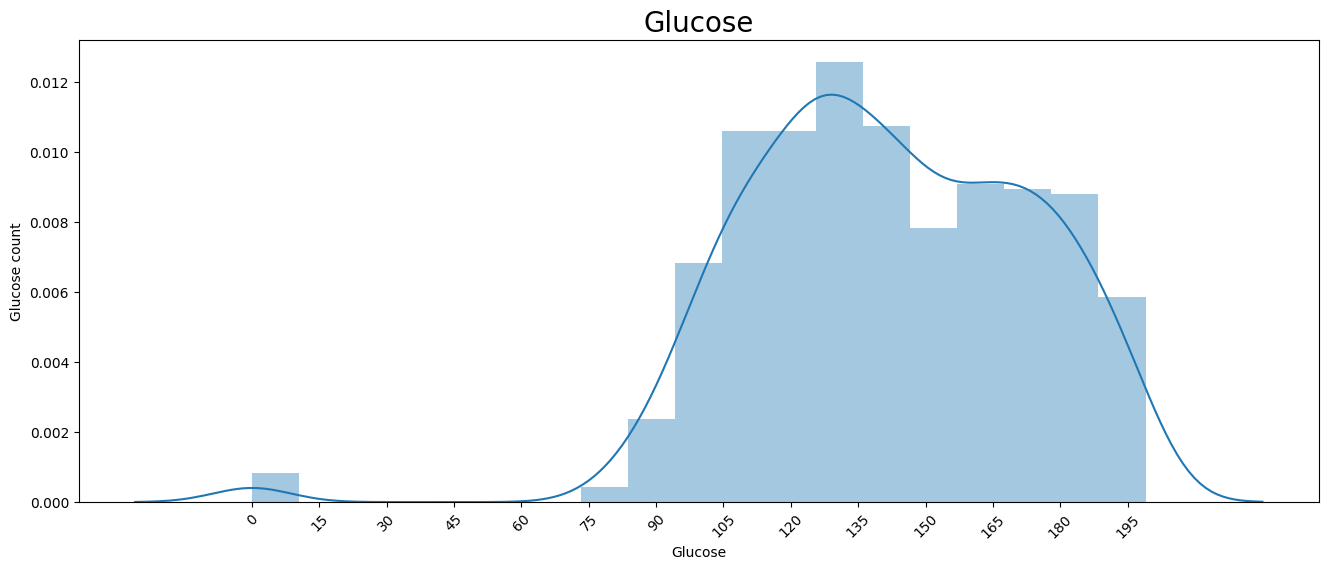

In [16]:
#glucose for diabetic
fig = plt.figure(figsize =(16,6))

sns.distplot(dataset["Glucose"][dataset["Outcome"] == 1])
plt.xticks([i for i in range(0,201,15)],rotation = 45)
plt.ylabel("Glucose count")
plt.title("Glucose",fontsize = 20)

<ipython-input-17-87428856066e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Insulin"][dataset["Outcome"]==1])


Text(0.5, 1.0, 'Insulin')

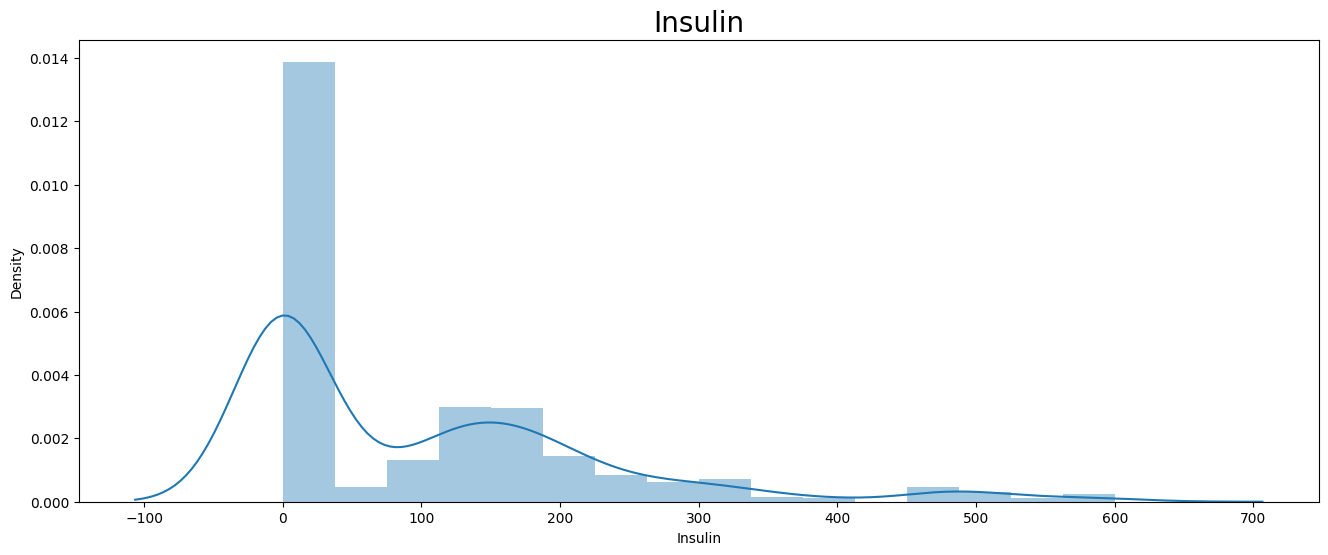

In [17]:
#insulin for diabetic

fig = plt.figure(figsize = (16,6))

sns.distplot(dataset["Insulin"][dataset["Outcome"]==1])
plt.xticks()
plt.title("Insulin",fontsize = 20)

<ipython-input-18-35802c52803e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["BMI"][dataset["Outcome"]==1])


Text(0.5, 1.0, 'BMI')

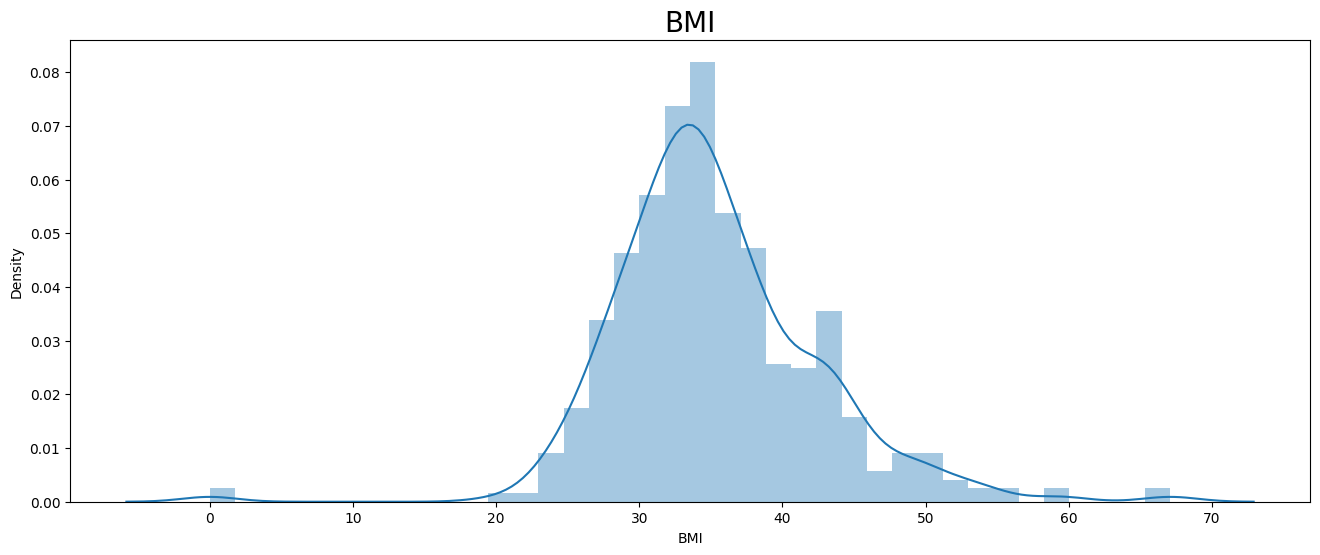

In [18]:
#BMI for diabetic
fig = plt.figure(figsize =(16,6))

sns.distplot(dataset["BMI"][dataset["Outcome"]==1])
plt.xticks()
plt.title("BMI",fontsize = 20)

<ipython-input-19-a01026a20c9c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["DiabetesPedigreeFunction"][dataset["Outcome"] == 1])


Text(0.5, 1.0, 'diabetespedigreefunction')

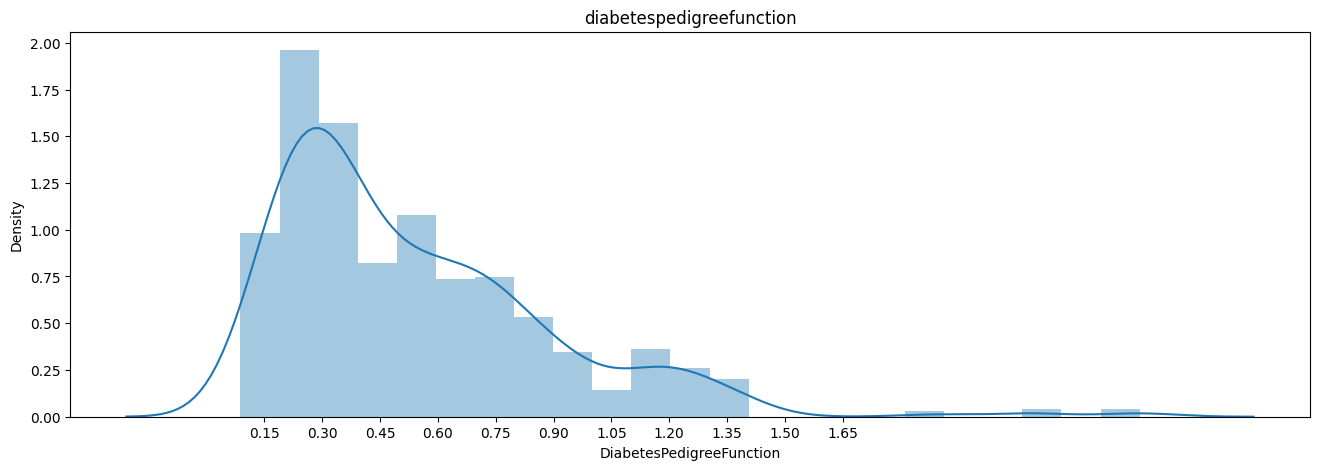

In [19]:
#diabeticpedigreefunction for diabetic
fig = plt.figure(figsize = (16,5))
sns.distplot(dataset["DiabetesPedigreeFunction"][dataset["Outcome"] == 1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("diabetespedigreefunction")

<ipython-input-20-dbd747bc9cb3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Age"][dataset["Outcome"] == 1])


Text(0.5, 1.0, 'Age')

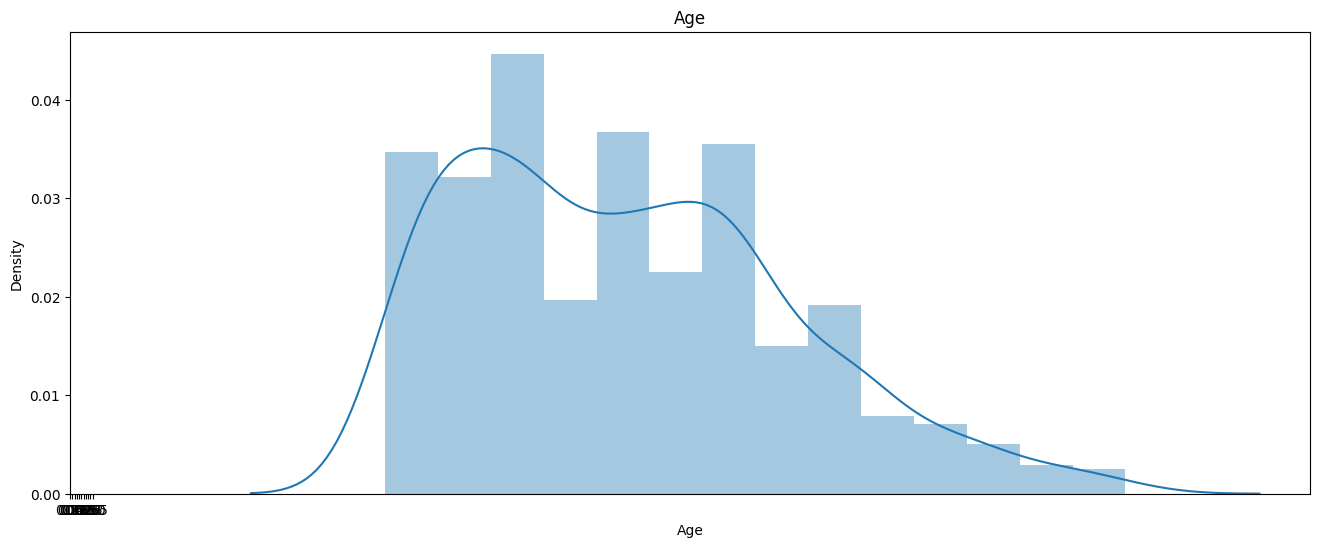

In [20]:
#Age for diabetic
fig = plt.figure(figsize = (16,6))

sns.distplot(dataset["Age"][dataset["Outcome"] == 1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("Age")

In [21]:
#Removing unnessary columns
x = dataset.drop(["Pregnancies","BloodPressure","SkinThickness","Outcome"],axis = 1)
y = dataset.iloc[:,-1]

In [22]:
# Splitting dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [23]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [24]:
# K-Nearest Neighbors (KNN) Classifier with Hyperparameter Tuning
knn = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [5, 10, 15, 20, 25], 'metric': ['minkowski', 'euclidean', 'manhattan']}
knn_grid = GridSearchCV(knn, knn_param_grid, cv=5)
knn_grid.fit(x_train, y_train)
best_knn = knn_grid.best_estimator_

In [25]:
# Use the best model for predictions
knn_y_pred = best_knn.predict(x_test)

In [26]:
mae = mean_absolute_error(y_test, knn_y_pred)
mse = mean_squared_error(y_test, knn_y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, knn_y_pred)
print("Regression Model Metrics (KNN):")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

Regression Model Metrics (KNN):
MAE: 0.1725
MSE: 0.1725
RMSE: 0.4153311931459037
R2 Score: 0.2072610294117646


In [27]:
# Classification Model Evaluation Metrics for KNN
knn_cm = confusion_matrix(y_test, knn_y_pred)
print("Classification Model Metrics (KNN):")
print("Confusion Matrix (KNN):")
print(knn_cm)
accuracy_knn = accuracy_score(y_test, knn_y_pred)
print("Accuracy Score (KNN):", accuracy_knn)
classification_report_knn = classification_report(y_test, knn_y_pred)
print("Classification Report (KNN):")
print(classification_report_knn)

Classification Model Metrics (KNN):
Confusion Matrix (KNN):
[[239  33]
 [ 36  92]]
Accuracy Score (KNN): 0.8275
Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       272
           1       0.74      0.72      0.73       128

    accuracy                           0.83       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.83      0.83      0.83       400



<Axes: >

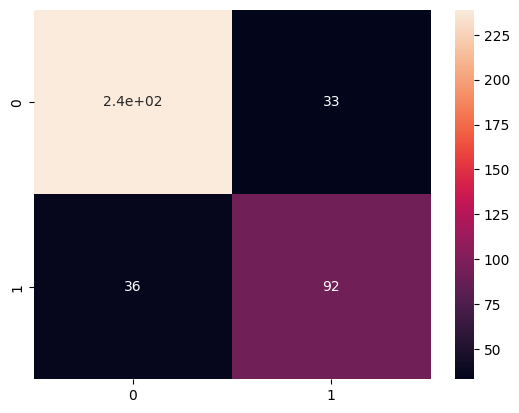

In [34]:
knn_cm = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(knn_cm, annot=True)

In [28]:
# Support Vector Machine (SVM) Classifier with Hyperparameter Tuning
svc = SVC()
svc_param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svc_grid = GridSearchCV(svc, svc_param_grid, cv=5)
svc_grid.fit(x_train, y_train)
best_svc = svc_grid.best_estimator_

In [29]:
# Use the best model for predictions
svc_y_pred = best_svc.predict(x_test)

In [30]:
svc_cm = confusion_matrix(y_test, svc_y_pred)
print("Classification Model Metrics (SVM):")
print("Confusion Matrix (SVM):")
print(svc_cm)
accuracy_svc = accuracy_score(y_test, svc_y_pred)
print("Accuracy Score (SVM):", accuracy_svc)
classification_report_svc = classification_report(y_test, svc_y_pred)
print("Classification Report (SVM):")
print(classification_report_svc)

Classification Model Metrics (SVM):
Confusion Matrix (SVM):
[[252  20]
 [ 56  72]]
Accuracy Score (SVM): 0.81
Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       272
           1       0.78      0.56      0.65       128

    accuracy                           0.81       400
   macro avg       0.80      0.74      0.76       400
weighted avg       0.81      0.81      0.80       400



In [31]:
# Naive Bayes (NB) Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)
nb_y_pred = nb_classifier.predict(x_test)

In [32]:
# Classification Model Evaluation Metrics for Naive Bayes
nb_cm = confusion_matrix(y_test, nb_y_pred)
print("Classification Model Metrics (Naive Bayes):")
print("Confusion Matrix (Naive Bayes):")
print(nb_cm)
accuracy_nb = accuracy_score(y_test, nb_y_pred)
print("Accuracy Score (Naive Bayes):", accuracy_nb)
classification_report_nb = classification_report(y_test, nb_y_pred)
print("Classification Report (Naive Bayes):")
print(classification_report_nb)

Classification Model Metrics (Naive Bayes):
Confusion Matrix (Naive Bayes):
[[242  30]
 [ 63  65]]
Accuracy Score (Naive Bayes): 0.7675
Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       272
           1       0.68      0.51      0.58       128

    accuracy                           0.77       400
   macro avg       0.74      0.70      0.71       400
weighted avg       0.76      0.77      0.76       400



In [33]:
# Save the best models and StandardScaler for future use
pickle.dump(best_svc, open('best_svc_classifier.pkl', 'wb'))
pickle.dump(best_knn, open('best_knn_classifier.pkl', 'wb'))
pickle.dump(sc, open('sc.pkl', 'wb'))